In [1]:
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [3]:
def f1(x1, x2):
    # x1 = np.array(x1)
    # x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2

### Question 1
Nous allons montrer que l'*ensemble de niveau* de $c$ est fermé et borné dans $\mathbb{R}^2$, c'est donc un **compact**.

* Premièrement, $\{c\}$ est un fermé, et $f$ est une fonction *continue*. Ainsi $f^{-1}(\{c\})$ est un fermé et c'est aussi exactement la *courbe de niveau* de $c$  


* Deuxièment, montrons que l'ensemble est borné, c'est à dire qu'il existe $A$ tel que pour tout $(x_1,x_2) \in\mathbb{R}^2,  \|(x_1,x_2)\|\geqslant A \Rightarrow f(x_1,x_2)\neq{c}$.  

On pose $B=2\lvert c\rvert$. Comme $f(x_1,x_2) \underset{\|(x_1,x_2)\| \to +\infty} {\longrightarrow} +\infty$, il existe A tel que :

$$
\forall(x_1,x_2)\in \mathbb{R}^2 , \|(x_1,x_2)\| \geqslant A \Rightarrow f(x_1,x_2) \geqslant B \Rightarrow f(x_1,x_2)\neq c
$$
  Ainsi, l'*ensemble de niveau* de $c$ est borné.

### Tache 1

In [32]:
N=100
eps=10**(-4)


def Newton(F, x0, y0, eps=eps, N=N):
    JF=J(F)
    for i in range(N):
        X0 = np.array([x0,y0])
        X= X0 - np.linalg.inv(JF(x0,y0)).dot(F(x0,y0))
        x,y = X
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return (x, y), f'atteint en {i} étapes'
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

In [33]:
c, dirx, diry = 0.8, 1, 1
def f1_test(x1, x2):
    return np.array([f1(x1, x2) - c, dirx*x2 - diry*x1])

In [44]:
Newton(f1_test, 0.8, 0.8)

((0.5163977794943233, -1.2648097754890477e-16), 'atteint en 5 étapes')

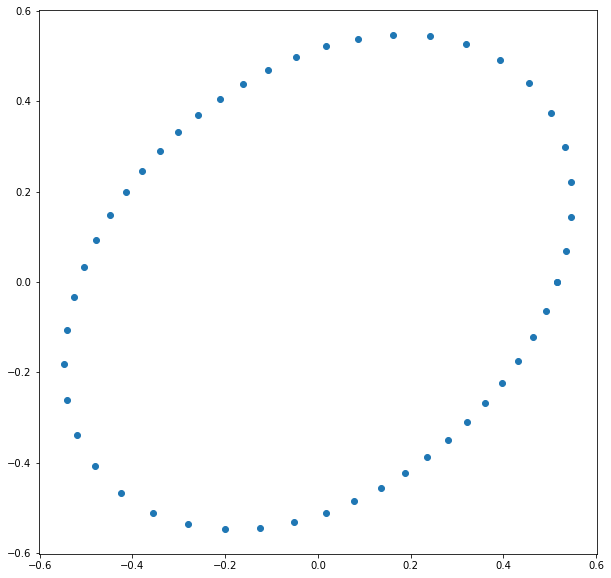

In [46]:
X,Y = [],[]
N = 50
c = 0.8
teta = np.linspace(0,2*np.pi,N)
for t in teta:
        dirx, diry = np.cos(t), np.sin(t)
        xf, yf = Newton(f1_test, dirx, diry)[0] #le choix de x0 et y0 est totalement arbitraire (il fallait juste que ça varie)
        X.append(xf)
        Y.append(yf)
plt.scatter(X,Y)
plt.show()